In [1]:
# QUESTION 3

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import seaborn as sn
Caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
Caravan_train
print(Caravan_train.shape)

(4630, 86)


In [2]:
# checking for missing numbers and no there no missing numbers
    
Caravan_train.isnull().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
MGODRK      0
MGODPR      0
MGODOV      0
MGODGE      0
MRELGE      0
MRELSA      0
MRELOV      0
MFALLEEN    0
MFGEKIND    0
MFWEKIND    0
MOPLHOOG    0
MOPLMIDD    0
MOPLLAAG    0
MBERHOOG    0
MBERZELF    0
MBERBOER    0
MBERMIDD    0
MBERARBG    0
MBERARBO    0
MSKA        0
MSKB1       0
MSKB2       0
MSKC        0
MSKD        0
MHHUUR      0
           ..
PGEZONG     0
PWAOREG     0
PBRAND      0
PZEILPL     0
PPLEZIER    0
PFIETS      0
PINBOED     0
PBYSTAND    0
AWAPART     0
AWABEDR     0
AWALAND     0
APERSAUT    0
ABESAUT     0
AMOTSCO     0
AVRAAUT     0
AAANHANG    0
ATRACTOR    0
AWERKT      0
ABROM       0
ALEVEN      0
APERSONG    0
AGEZONG     0
AWAOREG     0
ABRAND      0
AZEILPL     0
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
Purchase    0
Length: 86, dtype: int64

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/Users/capio/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Replacing yes and no with binary o/1

cleanup_Pur = {"Purchase": {"Yes": 1, "No": 0}} 
Caravan_train.replace(cleanup_Pur, inplace=True)

In [5]:
# The code below is used to determine the data type of all the variables

Caravan_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 86 columns):
MOSTYPE     4630 non-null int64
MAANTHUI    4630 non-null int64
MGEMOMV     4630 non-null int64
MGEMLEEF    4630 non-null int64
MOSHOOFD    4630 non-null int64
MGODRK      4630 non-null int64
MGODPR      4630 non-null int64
MGODOV      4630 non-null int64
MGODGE      4630 non-null int64
MRELGE      4630 non-null int64
MRELSA      4630 non-null int64
MRELOV      4630 non-null int64
MFALLEEN    4630 non-null int64
MFGEKIND    4630 non-null int64
MFWEKIND    4630 non-null int64
MOPLHOOG    4630 non-null int64
MOPLMIDD    4630 non-null int64
MOPLLAAG    4630 non-null int64
MBERHOOG    4630 non-null int64
MBERZELF    4630 non-null int64
MBERBOER    4630 non-null int64
MBERMIDD    4630 non-null int64
MBERARBG    4630 non-null int64
MBERARBO    4630 non-null int64
MSKA        4630 non-null int64
MSKB1       4630 non-null int64
MSKB2       4630 non-null int64
MSKC        4630 non-null int

In [6]:
# Generating the descriptive statistics of the variables

numerics = ['float64', 'int64']
numeric_ds = Caravan_train.select_dtypes(include=numerics)
numeric_ds.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
count,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,...,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000
mean,24.312311,1.110367,2.680130,2.994600,5.784449,0.700648,4.608855,1.083369,3.267603,6.180562,...,0.005400,0.006695,0.004752,0.563499,0.000648,0.006911,0.030886,0.007127,0.014471,0.061339
std,12.777356,0.407481,0.789769,0.816876,2.843619,1.000874,1.711451,1.016798,1.584479,1.907963,...,0.073291,0.081560,0.077629,0.568267,0.025449,0.085424,0.209198,0.084132,0.121229,0.239977
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000


In [7]:
# The variables seem not to be correlated. 
#The variables MOSTYPE and MOSHOOFD have a strong correlation

Caravan_train.corr()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
MOSTYPE,1.000000,-0.044048,-0.016344,0.014257,0.992544,-0.191005,0.092986,-0.023055,-0.023837,-0.068623,...,0.023574,-0.011543,-0.015218,-0.007998,0.008678,-0.016822,-0.024057,-0.017947,-0.048942,-0.065993
MAANTHUI,-0.044048,1.000000,0.002990,0.047221,-0.051430,0.007929,-0.024511,0.014807,0.012465,0.011874,...,0.001742,0.003761,-0.016582,-0.012080,-0.006897,0.002906,-0.022257,0.008557,0.002648,-0.007388
MGEMOMV,-0.016344,0.002990,1.000000,-0.333849,0.022775,0.015758,0.049341,-0.104790,-0.012029,0.544272,...,-0.011209,0.006426,0.017749,-0.018993,0.010314,-0.002447,0.029735,0.031068,0.025793,0.031737
MGEMLEEF,0.014257,0.047221,-0.333849,1.000000,0.009357,-0.038705,0.100165,0.064524,-0.129570,-0.041927,...,0.025745,0.000543,0.003811,0.034013,0.000168,-0.008753,0.007297,-0.018300,-0.025388,0.009404
MOSHOOFD,0.992544,-0.051430,0.022775,0.009357,1.000000,-0.197406,0.101058,-0.031440,-0.025264,-0.028382,...,0.024244,-0.010542,-0.014932,-0.009175,0.007901,-0.020546,-0.025121,-0.017958,-0.046723,-0.065778
MGODRK,-0.191005,0.007929,0.015758,-0.038705,-0.197406,1.000000,-0.375714,0.014339,-0.058998,-0.043864,...,-0.001520,0.013973,-0.020615,-0.006833,-0.000865,0.014097,0.003928,-0.013139,-0.001680,0.008109
MGODPR,0.092986,-0.024511,0.049341,0.100165,0.101058,-0.375714,1.000000,-0.315319,-0.740267,0.150905,...,-0.008993,0.003289,0.005862,0.048978,0.015740,0.018495,-0.001850,0.008864,0.024163,0.028448
MGODOV,-0.023055,0.014807,-0.104790,0.064524,-0.031440,0.014339,-0.315319,1.000000,-0.140296,-0.122902,...,0.008452,0.001082,0.022349,0.010651,-0.027133,0.008288,0.015313,-0.009473,0.004231,0.008254
MGODGE,-0.023837,0.012465,-0.012029,-0.129570,-0.025264,-0.058998,-0.740267,-0.140296,1.000000,-0.107811,...,-0.001284,0.001177,-0.005071,-0.053785,-0.009658,-0.031224,-0.003433,0.001895,-0.034785,-0.042610
MRELGE,-0.068623,0.011874,0.544272,-0.041927,-0.028382,-0.043864,0.150905,-0.122902,-0.107811,1.000000,...,0.003840,0.018606,0.016084,-0.000216,0.010937,-0.001031,0.019582,0.002747,0.039136,0.071112


[]

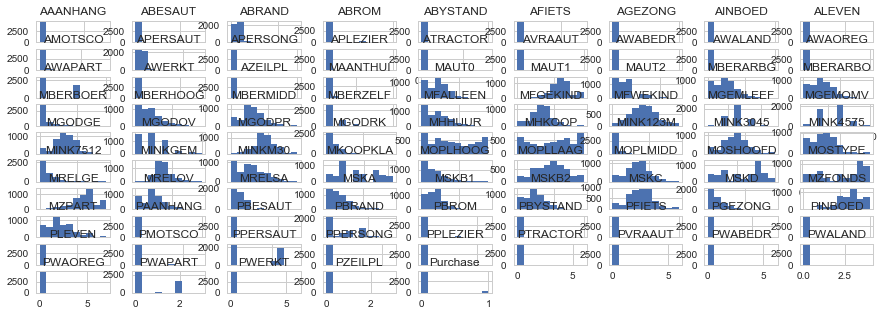

In [8]:
# histogram plots for numerical variables 
#(they do not appear to be normally distributed)

numeric_ds.hist(figsize=(15,5))
plt.plot()

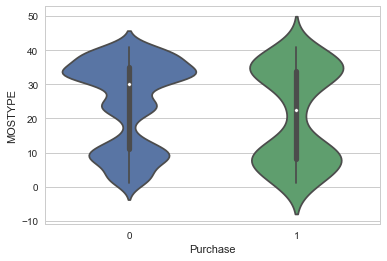

In [9]:
# The violin plot shows how the values of MOSTYPE are distributed for the purchases
sns.violinplot(x="Purchase", y="MOSTYPE", data=numeric_ds);

In [10]:
# Determining how many customers purchase insurace (1) and those that do not (0)
# It is observed that many customers do not purchase insurance

Caravan_train.groupby('Purchase').size()

Purchase
0    4346
1     284
dtype: int64

<function matplotlib.pyplot.show>

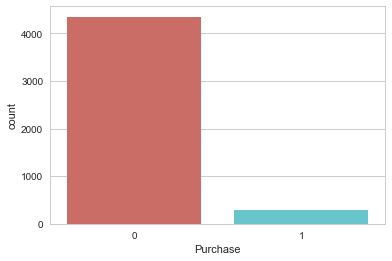

In [11]:
# Bar graph showing the counts of purchases

sns.countplot(x='Purchase',data=Caravan_train, palette='hls') 
plt.show

In [12]:
# Logistic Regression, KNN Classifier, Naive Bayes and 
#Decision Trees Models are compared and the best
# model is selected with respect to their test accuracies

In [13]:
## LOGISTIC REGRESSION

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
from sklearn.model_selection import train_test_split
y=Caravan_train.Purchase
X=Caravan_train.drop('Purchase', axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                    test_size=0.2,random_state=0)

In [17]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.940
Test set score: 0.931


In [18]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.941
Test set score: 0.931


In [19]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.940
Test set score: 0.932


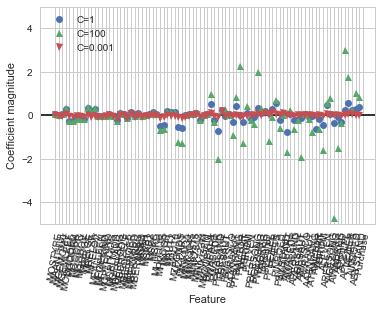

In [20]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(Caravan_train.shape[1]), Caravan_train, rotation=80)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [21]:
## KNN CLASSIFIER

In [22]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  


[[857   6]
 [ 63   0]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       863
          1       0.00      0.00      0.00        63

avg / total       0.87      0.93      0.90       926



In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

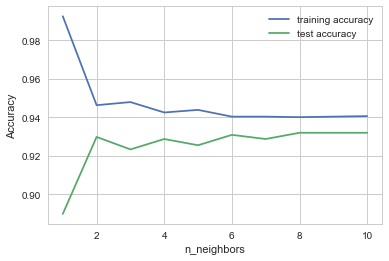

In [25]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [26]:
## NAIVE BAYES CLASSIFIER

In [27]:
#Building the classifier and training it with the training data

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [28]:
#The Naive Bayes Classifier doesn't predict the purchases well

accuracy_score(y_test, y_pred, normalize = True)  

0.14254859611231102

In [29]:
## DECISION TREES

from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,
                 test_size=0.2,random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.884


In [30]:
#getting the probabilities associated with buying or not buying insurance

probs=logreg100.predict_proba(X_test)

In [31]:
## Using probabilities to select the indexes of the best 50 customers

import pandas
pbs=pandas.DataFrame(probs,columns=['a','b'])
pbs
pbs.sort_index(by='b',ascending=False)

/Users/capio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,a,b
180,0.464262,5.357377e-01
897,0.524641,4.753588e-01
414,0.553480,4.465205e-01
7,0.559947,4.400533e-01
563,0.596844,4.031562e-01
52,0.607232,3.927679e-01
183,0.625243,3.747572e-01
796,0.632942,3.670577e-01
214,0.655031,3.449691e-01
498,0.676545,3.234553e-01


In [32]:
## Building ROC Curve using the Logistic Regression Model to get the AUC
## The AUC of the ROC is used as a measure of classifier performance

In [33]:
# Keeping the probabilities for the column consisting 
#of customer who "do not purchase of insurance"
pbbs = probs[:, 1]

AUC: 0.709


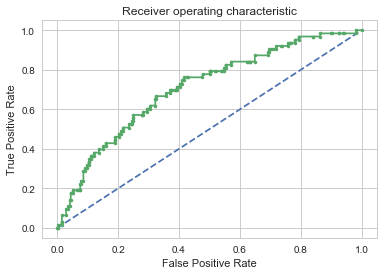

In [34]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculating the AUC
auc = roc_auc_score(y_test, pbbs)
print('AUC: %.3f' % auc)

# calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pbbs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
pyplot.show()

In [35]:
# The AUC probability of 0.709 can be interpreted as a 0.709  probability 
#that the Logistic classifier will assign
# a higher score to a randomly chosen customer who 
#purchase insurance than to a randomly chosen customer who
# does not purchase insurance